In [4]:
import requests
import pandas as pd
import geopandas as gpd
from shapely import wkt

cookies = {
    'utag_main__sn': '1',
    'utag_main_ses_id': '1759190774539%3Bexp-session',
    'split_segmentation': 'FAB',
    'utag_main_vapi_domain': 'metrocuadrado.com',
    'at_check': 'true',
    'utag_main__ss': '0%3Bexp-session',
    '_ga': 'GA1.1.1723186862.1759190777',
    '_hjSession_3298791': 'eyJpZCI6ImNkNjJmMTA5LTkwNWYtNDZjYi05NzM2LWExYTU1MGFkNDk0NCIsImMiOjE3NTkxOTA3Nzc1MzEsInMiOjAsInIiOjAsInNiIjowLCJzciI6MCwic2UiOjAsImZzIjoxLCJzcCI6MH0=',
    'utag_main_v_id': '019997f0fef40034be6ec5bdf2f40506f004606700bd0',
    'utag_main_dc_visit': '1',
    '_gcl_au': '1.1.1340364105.1759190778',
    'utag_main_dc_region': 'us-east-1%3Bexp-session',
    'disclaimerCookies': 'true',
    'canary_param': 'false',
    'utag_main__pn': '2%3Bexp-session',
    'mbox': 'session#18d0a1531b534edfa52e1d30995c2f70#1759192954|PC#18d0a1531b534edfa52e1d30995c2f70.35_0#1822435894',
    '_hjSessionUser_3298791': 'eyJpZCI6IjkwZDkyMTBjLTcwNzItNTM1ZS1iMDFjLTM3NjAxNTBkNTliMSIsImNyZWF0ZWQiOjE3NTkxOTA3Nzc1MzAsImV4aXN0aW5nIjp0cnVlfQ==',
    'utag_main_dc_event': '2%3Bexp-session',
    'cto_bundle': 'a72py19FdUdibjZlSEhpQUcyQ3FQUkJiVUtpJTJGTkQwJTJCbEtmRUVidkJjVEVxeWxoN3JWWDI4YnIwNkhGS2hseW83cFglMkZDJTJCJTJGS2hhcVlOdENjNG9QdUhJJTJCQURGU2xUYVVvOTFKQ2pJbDQ3aTNxdzZaQlRDc0xiJTJGT2M2aXYzWVdJZEw0VTBtbEd3WWp4dmYlMkJPdzlqRzBUVXVPSFNEZ0ExUGYwbmlXWmVvTFU2WkJmaW1FJTNE',
    'AWSALB': 'oQy7tnOnwBWCXngTqYDy3ObtgNC1bG5OZxCbXGCyqwZhwBS+YqFTDxIdITXaR+iGLf6MwLUmXF5cp656Z7NxD3RR+Gc5kJHeKuc1F0AflDQOOojdcw0wfCQkSqyAEyletuIjgTTYKggqt1RJ+N4dhJGPZbhCpU8odtbeQ/1hN/nCVQQs2jVwBCDrgmhoMg==',
    'utag_main__se': '30%3Bexp-session',
    'utag_main__st': '1759193014703%3Bexp-session',
    '_ga_02LQXVPQF9': 'GS2.1.s1759190777$o1$g1$t1759191255$j19$l0$h0',
}

headers = {
    'accept': '*/*',
    'accept-language': 'es,es-ES;q=0.9,en;q=0.8',
    'content-type': 'application/json',
    'priority': 'u=1, i',
    'referer': 'https://www.metrocuadrado.com/inmuebles/arriendo/medellin/?search=form',
    'sec-ch-ua': '"Chromium";v="140", "Not=A?Brand";v="24", "Google Chrome";v="140"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36',
    'x-api-key': 'P1MfFHfQMOtL16Zpg36NcntJYCLFm8FqFfudnavl',
    # 'cookie': 'utag_main__sn=1; utag_main_ses_id=1759190774539%3Bexp-session; split_segmentation=FAB; utag_main_vapi_domain=metrocuadrado.com; at_check=true; utag_main__ss=0%3Bexp-session; _ga=GA1.1.1723186862.1759190777; _hjSession_3298791=eyJpZCI6ImNkNjJmMTA5LTkwNWYtNDZjYi05NzM2LWExYTU1MGFkNDk0NCIsImMiOjE3NTkxOTA3Nzc1MzEsInMiOjAsInIiOjAsInNiIjowLCJzciI6MCwic2UiOjAsImZzIjoxLCJzcCI6MH0=; utag_main_v_id=019997f0fef40034be6ec5bdf2f40506f004606700bd0; utag_main_dc_visit=1; _gcl_au=1.1.1340364105.1759190778; utag_main_dc_region=us-east-1%3Bexp-session; disclaimerCookies=true; canary_param=false; utag_main__pn=2%3Bexp-session; mbox=session#18d0a1531b534edfa52e1d30995c2f70#1759192954|PC#18d0a1531b534edfa52e1d30995c2f70.35_0#1822435894; _hjSessionUser_3298791=eyJpZCI6IjkwZDkyMTBjLTcwNzItNTM1ZS1iMDFjLTM3NjAxNTBkNTliMSIsImNyZWF0ZWQiOjE3NTkxOTA3Nzc1MzAsImV4aXN0aW5nIjp0cnVlfQ==; utag_main_dc_event=2%3Bexp-session; cto_bundle=a72py19FdUdibjZlSEhpQUcyQ3FQUkJiVUtpJTJGTkQwJTJCbEtmRUVidkJjVEVxeWxoN3JWWDI4YnIwNkhGS2hseW83cFglMkZDJTJCJTJGS2hhcVlOdENjNG9QdUhJJTJCQURGU2xUYVVvOTFKQ2pJbDQ3aTNxdzZaQlRDc0xiJTJGT2M2aXYzWVdJZEw0VTBtbEd3WWp4dmYlMkJPdzlqRzBUVXVPSFNEZ0ExUGYwbmlXWmVvTFU2WkJmaW1FJTNE; AWSALB=oQy7tnOnwBWCXngTqYDy3ObtgNC1bG5OZxCbXGCyqwZhwBS+YqFTDxIdITXaR+iGLf6MwLUmXF5cp656Z7NxD3RR+Gc5kJHeKuc1F0AflDQOOojdcw0wfCQkSqyAEyletuIjgTTYKggqt1RJ+N4dhJGPZbhCpU8odtbeQ/1hN/nCVQQs2jVwBCDrgmhoMg==; utag_main__se=30%3Bexp-session; utag_main__st=1759193014703%3Bexp-session; _ga_02LQXVPQF9=GS2.1.s1759190777$o1$g1$t1759191255$j19$l0$h0',
}

params = {
    'size': '50',
    'from': '0',
    'realEstateBusinessList': 'arriendo',
    'city': 'medellin',
}

response = requests.get('https://www.metrocuadrado.com/rest-search/search', params=params, cookies=cookies, headers=headers)

In [5]:
def datos(num_paginas=201, operacion='arriendo', ciudad='medellin'):
    lista = []
    for j in range(0, num_paginas):  # Puedes cambiar el rango para obtener más o menos resultados
        params = {
    'size': '50',
    'from': f'{50*j}',
    'realEstateBusinessList': f'{operacion}',
    'city': f'{ciudad}',
}
        resul = requests.get('https://www.metrocuadrado.com/rest-search/search', params=params, cookies=cookies, headers=headers)
        
        
        resul = resul.json()
        for i in range(len(resul.get('results'))):
                
            try:
                barrio = resul.get('results')[i].get('mnombrecomunbarrio')
            except:
                barrio = 'No disponible'
            try:
                barrio_1 = resul.get('results')[i].get('mbarrio')
            except:
                barrio_1 = 'No disponible'
            try:
                telefono = resul.get('results')[i].get('contactPhone')
            except:
                telefono = 'No disponible'
            try:
                precio = (resul.get('results')[i].get('mvalorarriendo') if operacion == 'arriendo' else resul.get('results')[i].get('mvalorventa'))
            except:
                precio = 'No disponible'
            try:
                area = resul.get('results')[i].get('marea')
            except:
                area = 'No disponible'
            try:
                habitaciones = resul.get('results')[i].get('mnrocuartos')
            except:
                habitaciones = 'No disponible'
            try:
                baños = resul.get('results')[i].get('mnrobanos')
            except:
                baños = 'No disponible'
            try:
                parqueaderos = resul.get('results')[i].get('mnrogarajes')
            except:
                parqueaderos = 'No disponible'
            try:
                url = resul.get('results')[i].get('link')
                url = 'https://www.metrocuadrado.com' + url
            except:
                url = 'No disponible'
            try:
                tipo = resul.get('results')[i].get('mtipoinmueble').get('nombre')
            except:
                tipo = 'No disponible'
            try:
                latitude = resul.get('results')[i].get('localizacion').get('lat') 
            except:
                latitude = None
            try:
                longitude = resul.get('results')[i].get('localizacion').get('lon')
            except:
                longitude = None
            

            
            lista.append({
                
                'barrio': barrio,
                'precio': precio,
                'area': area,
                'habitaciones': habitaciones,
                'baños': baños,
                'parqueaderos': parqueaderos,
                'telefono': telefono,
                'url': url,
                'tipo': tipo,
                'area': area,
                'latitud': latitude,
                'longitud': longitude,
                'barrio_1': barrio_1
            })
        df = pd.DataFrame(lista)
        df = df[df['tipo'].str.contains('Apartamento|Casa', na=False, case=False)]
    return df

In [6]:
arriendo = datos(num_paginas=201, operacion='arriendo', ciudad='medellin')
venta = datos(num_paginas=201, operacion='venta', ciudad='medellin')


<Axes: >

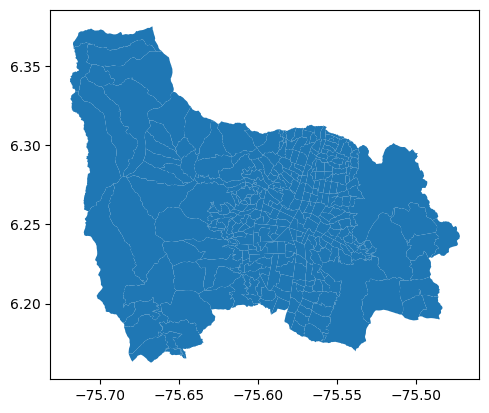

In [7]:
med_geo = gpd.read_file('med.shp')


med_geo.plot()

In [8]:

from rapidfuzz import process, fuzz

def nombres(geo, df):
    d = geo.copy()
    # Asegurarnos de que las columnas son texto
    df['barrio'] = df['barrio'].astype(str).str.strip().str.lower()
    d['NOMBRE'] = d['NOMBRE'].astype(str).str.strip().str.lower()

    # Obtener lista de nombres de referencia
    barrios_ref = d['NOMBRE'].unique().tolist()

    # Encontrar el barrio más similar
    matches = df['barrio'].apply(
        lambda x: process.extractOne(x, barrios_ref, scorer=fuzz.token_sort_ratio)
    )

    # Extraer resultados: nombre coincidente y puntuación
    df['barrio_match'] = matches.apply(lambda x: x[0] if x else None)
    df['similaridad'] = matches.apply(lambda x: x[1] if x else None)

    # Opcional: filtrar solo los que tienen alta similitud (>80)
    df['barrio_final'] = df.apply(
        lambda row: row['barrio_match'] if row['similaridad'] >= 80 else row['barrio'],
        axis=1
    )
    

    # Mostrar los primeros resultados
    print(df[['barrio', 'barrio_match', 'similaridad', 'barrio_final']].head(20))
    return df


In [76]:
def clean(geo, df):
    # Asegurar CRS estándar
    geo = geo.to_crs(epsg=4326)
    
    # Calcular centroides
    geo['geo_x'] = geo.geometry.centroid.x  # longitud
    geo['geo_y'] = geo.geometry.centroid.y  # latitud

    # Límites del polígono
    x_min, x_max = geo['geo_x'].min(), geo['geo_x'].max()
    y_min, y_max = geo['geo_y'].min(), geo['geo_y'].max()

    # Detectar coordenadas fuera de límites
    mask_out = (
        (df['longitud'] > x_max) |
        (df['longitud'] < x_min) |
        (df['latitud'] > y_max) |
        (df['latitud'] < y_min)
    )

    # Verificar que la columna 'NOMBRE' existe en geo
    if 'NOMBRE' not in geo.columns:
        raise KeyError("La columna 'NOMBRE' no existe en el GeoDataFrame proporcionado.")
    # Reemplazar coordenadas erróneas
    df_out = df[mask_out].merge(
        geo[['NOMBRE', 'geo_x', 'geo_y']],
        left_on='barrio', right_on='NOMBRE',
        how='left'
    )

    # Asegurarse de que los índices coincidan para asignación segura
    df.loc[mask_out, 'latitud'] = df_out['geo_y'].values if len(df_out) == mask_out.sum() else df_out.set_index(df_out.index)['geo_y']
    df.loc[mask_out, 'longitud'] = df_out['geo_x'].values if len(df_out) == mask_out.sum() else df_out.set_index(df_out.index)['geo_x']

    return df


In [20]:
df_clean_arr = clean(med_geo ,arriendo)
df_clean_ven = clean(med_geo, venta)

C:\Users\roman\AppData\Local\Temp\ipykernel_13044\2359384003.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['geo_x'] = geo.geometry.centroid.x  # longitud
C:\Users\roman\AppData\Local\Temp\ipykernel_13044\2359384003.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['geo_y'] = geo.geometry.centroid.y  # latitud
C:\Users\roman\AppData\Local\Temp\ipykernel_13044\2359384003.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['geo_x'] = geo.geometry.centroid.x  # longitud
C:\Users\roman\AppData\Local\Temp\ipykernel_13044\2359384003.py:7: UserWarning: Geomet

In [11]:
def geodf_arr(df):
    return gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitud, df.latitud), crs="EPSG:4326"
    )

def geodf_ven(df):
    return gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitud, df.latitud), crs="EPSG:4326"
    )


In [12]:
arriendo_geo = geodf_arr(df_clean_arr)
venta_geo = geodf_ven(df_clean_ven)

In [13]:
arriendo_geo

,barrio,precio,area,habitaciones,baños,parqueaderos,telefono,url,tipo,latitud,longitud,barrio_1,geometry
0,ROBLEDO,1500000,52.0,3,1,0,6044121220,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.291718,-75.585373,KENNEDY,POINT (-75.58537 6.29172)
1,Provenza,4300000,70.0,2,2,1,6044483250,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.206130,-75.561090,PROVENZA,POINT (-75.56109 6.20613)
2,Estadio,5800000,260.0,4,3,1,3174019439,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.261288,-75.595724,ESTADIO,POINT (-75.59572 6.26129)
3,CALASANZ PARTE ALTA,2700000,77.0,3,2,1,3196727803,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.262014,-75.601273,LOS ALCAZARES,POINT (-75.60127 6.26201)
4,EL POBLADO EL TESORO Suroriente,8000000,180.0,3,4,3,3168329831,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.202259,-75.558784,EL TESORO,POINT (-75.55878 6.20226)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,Poblado,2850000,60.0,2,2,0,3158356668,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.190521,-75.582211,URBANIZACION VILLA JARDIN I ETAPA,POINT (-75.58221 6.19052)
10062,Carlos E Restrepo,3600000,125.0,4,3,0,3503639825,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.257906,-75.579897,URBANIZACION CARLOS E RESTREPO,POINT (-75.5799 6.25791)
10063,Estadio,4000000,160.0,5,2,1,3224360721,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.261490,-75.596400,ESTADIO,POINT (-75.5964 6.26149)
10064,El Poblado,7500000,180.0,3,4,0,3158356668,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.196452,-75.572246,LOS BALSOS NO 2,POINT (-75.57225 6.19645)


In [14]:
def geo_join(arriendo, venta, med_geo):
    arriendo_join = arriendo.sjoin(med_geo, how='left')
    arriendo_join.columns = arriendo_join.columns.str.lower()
    df_arr = pd.DataFrame(arriendo_join)
    venta_join = venta.sjoin(med_geo, how='left')
    venta_join.columns = venta_join.columns.str.lower()
    df_ven = pd.DataFrame(venta_join)
    return df_arr, df_ven



In [15]:
arriendo_mede, venta_mede = geo_join(arriendo_geo, venta_geo, med_geo)


In [16]:
arriendo_mede

,barrio,precio,area,habitaciones,baños,parqueaderos,telefono,url,tipo,latitud,...,codigo,nombre,abreviatur,identifica,limitecomu,zhfisicage,limitemuni,vigencia_f,subtipo_ba,link_docum
0,ROBLEDO,1500000,52.0,3,1,0,6044121220,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.291718,...,0607,Kennedy,None,0607,06,None,001,None,1.0,None
1,Provenza,4300000,70.0,2,2,1,6044483250,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.206130,...,1417,La Florida,None,1417,14,None,001,None,1.0,None
2,Estadio,5800000,260.0,4,3,1,3174019439,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.261288,...,1113,Estadio,None,1113,11,None,001,None,1.0,None
3,CALASANZ PARTE ALTA,2700000,77.0,3,2,1,3196727803,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.262014,...,1304,Los Alcázares,None,1304,13,None,001,None,1.0,None
4,EL POBLADO EL TESORO Suroriente,8000000,180.0,3,4,3,3168329831,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.202259,...,1409,El Tesoro,None,1409,14,None,001,None,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,Poblado,2850000,60.0,2,2,0,3158356668,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.190521,...,1423,Santa María de Los Ángeles,None,1423,14,None,001,None,1.0,None
10062,Carlos E Restrepo,3600000,125.0,4,3,0,3503639825,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.257906,...,1101,Carlos E. Restrepo,None,1101,11,None,001,None,1.0,None
10063,Estadio,4000000,160.0,5,2,1,3224360721,https://www.metrocuadrado.com/inmueble/arriend...,Casa,6.261490,...,1113,Estadio,None,1113,11,None,001,None,1.0,None
10064,El Poblado,7500000,180.0,3,4,0,3158356668,https://www.metrocuadrado.com/inmueble/arriend...,Apartamento,6.196452,...,1415,Los Balsos No.2,None,1415,14,None,001,None,1.0,None


In [17]:
def arriendo_med(df):
    df = df[['tipo', 'precio', 'area', 'habitaciones', 'baños', 'parqueaderos', 'nombre']]
    df = df.dropna(subset=['nombre','habitaciones','baños'])
    return df

def venta_med(df):
    df = df[['tipo', 'precio', 'area', 'habitaciones', 'baños', 'parqueaderos', 'nombre']]
    df = df.dropna(subset=['nombre','habitaciones','baños'])
    return df


In [71]:
test_arr = arriendo_mede[(arriendo_mede['latitud'] < 6.28) & (arriendo_mede['longitud'] > -75.62) & (arriendo_mede['longitud'] < -75.55)]
test_ven = venta_mede[(venta_mede['latitud'] < 6.28) & (venta_mede['longitud'] > -75.62) & (venta_mede['longitud'] < -75.55)]


In [72]:
arr_def_mede = arriendo_med(test_arr)
ven_def_mede = venta_med(test_ven)

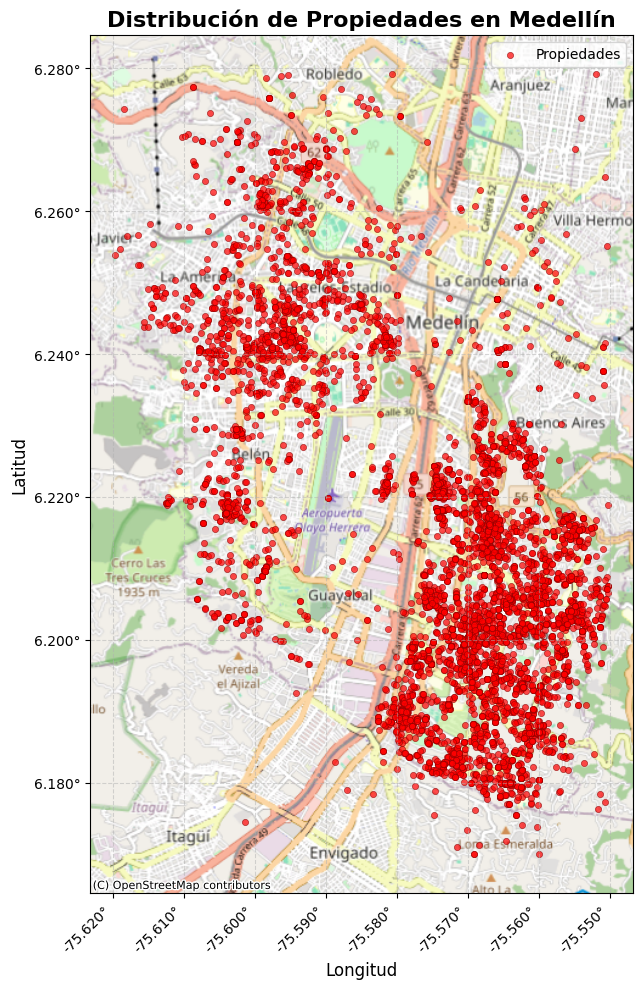

In [75]:
import matplotlib.pyplot as plt
import contextily as ctx
from shapely import wkt

# Cargar y preparar los datos (ejemplo)
test = ...  # Tu DataFrame original
gdf = gpd.GeoDataFrame(test_arr, geometry='geometry')
gdf_web = gdf.to_crs(epsg=4326)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar los puntos
gdf_web.plot(ax=ax, 
             color='red', 
             markersize=20, 
             alpha=0.7, 
             edgecolor='darkred', 
             linewidth=0.5, 
             label='Propiedades')

# Añadir mapa base
ctx.add_basemap(ax, crs=gdf_web.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Personalizar la grilla de coordenadas
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

# Formatear los ticks para mostrar grados
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.3f}°'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.3f}°'))

# Rotar etiquetas de longitud para mejor legibilidad
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Distribución de Propiedades en Medellín', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
primero_arr = Pipeline([('datos', datos(num_paginas=201, operacion='arriendo', ciudad='medellin')),()])

